In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
column_names = [
    "Water",
    "Food energy",
    "Protein",
    "Total lipids (fat)",
    "Ash",
    "Carbohydrate",
    "Total dietary fiber",
    "Total sugars",
    "Calcium",
    "Iron",
    "Magnesium",
    "Phosphorus",
    "Potassium",
    "Sodium",
    "Zinc",
    "Copper",
    "Manganese",
    "Selenium",
    "Vitamin C",
    "Thiamin",
    "Riboflavin",
    "Niacin",
    "Pantothenic acid",
    "Vitamin B6",
    "Total Folate",
    "Folic acid",
    "Food Folate",
    "Folate",
    "Vitamin B12",
    "Vitamin A",
    "VitA",
    "Retinol",
    "Vitamin E",
    "Vitamin K",
    "Alpha-carotene",
    "Beta-carotene",
    "Beta-cryptoxanthin",
    "Lycopene",
    "Lutein + zeaxanthin",
    "Saturated fatty acid",
    "Monounsaturated fatty acids",
    "Polyunsaturated fatty acids",
    "Cholesterol",
    "1st household weight from Weight file",
    "2nd household weight from Weight file",
    "Percent refuse"
]

In [86]:
x1 = pd.read_csv("x1.csv", header=None, names=column_names)
x2 = pd.read_csv("x2.csv", header=None, names=column_names)
y1 = pd.read_csv("y1.csv", header=None, names=["Gt"])
y2 = pd.read_csv("y2.csv", header=None, names=["Gt"])

In [87]:
x1.isna().sum()

Water                                     0
Food energy                               0
Protein                                   0
Total lipids (fat)                        0
Ash                                       0
Carbohydrate                              0
Total dietary fiber                       0
Total sugars                              0
Calcium                                   0
Iron                                      0
Magnesium                                 0
Phosphorus                                0
Potassium                                 0
Sodium                                    0
Zinc                                      0
Copper                                    0
Manganese                                 0
Selenium                                  0
Vitamin C                                 0
Thiamin                                   0
Riboflavin                                0
Niacin                                    0
Pantothenic acid                

In [88]:
x1.dropna(axis=1, inplace = True)
x2.dropna(axis=1, inplace = True)

In [89]:
y1.head()

,Gt
0,-0.767340
1,-0.072655
2,0.045429
3,-1.169300
4,0.552800


In [90]:
x1.shape

(50, 26)

In [91]:
y1.shape

(50, 1)

In [92]:
x2.shape

(50, 26)

In [93]:
x2.head()

,Water,Food energy,Protein,Total lipids (fat),Ash,Carbohydrate,Total dietary fiber,Total sugars,Calcium,Iron,...,Manganese,Selenium,Vitamin C,Thiamin,Riboflavin,Niacin,Pantothenic acid,Vitamin B6,Total Folate,Folic acid
0,-1.472500,0.040221,-0.184030,-0.775260,-2.25400,-1.248900,0.076201,0.57249,-0.66675,0.63484,...,-0.48008,0.88803,2.549700,-0.797880,1,-0.49989,0.27105,0.82444,0.02131,-0.42288
1,1.068000,0.197180,-0.562430,-0.162000,1.23040,0.084049,0.807030,-0.88252,1.22520,0.37915,...,-1.29660,-0.27845,0.895210,-0.089012,1,0.38247,-0.36754,-0.40374,1.37010,-0.38080
2,0.046897,2.284600,-1.864900,1.466400,-0.63959,0.005554,-0.226670,-1.94150,-0.51689,0.33673,...,-0.43896,1.06600,-0.072292,-0.473980,1,-0.70156,0.19032,0.91833,1.15150,-2.19500
3,0.483440,1.463800,-0.013712,-0.037563,2.41740,-0.246470,-1.035800,0.56813,-0.70365,-2.16540,...,-1.32600,0.81510,-0.811230,0.231450,1,-2.59760,-0.51483,1.34540,-1.74290,0.57277
4,-1.848600,1.279400,-0.211740,0.198340,-0.83718,2.486100,1.897400,0.86957,-0.71522,1.28400,...,0.51365,0.15240,-0.340210,-1.307900,1,0.17259,-0.61924,0.82814,1.03530,2.20130


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [95]:
reg = LinearRegression()
reg.fit(x1, y1)

LinearRegression()

In [96]:
y_hat = reg.predict(x2)

In [97]:
r2 = r2_score(y2, y_hat)
print("R2: ", r2)

R2:  0.9606822396194844


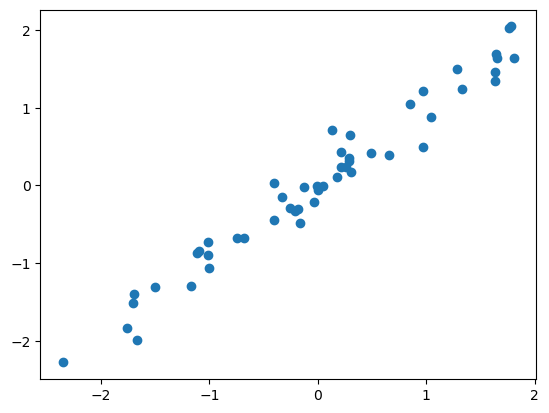

In [98]:
plt.scatter(y2, y_hat)

In [99]:
merged_x = pd.concat([x1, x2], ignore_index=True)
merged_y = pd.concat([y1, y2], ignore_index=True)

In [100]:
merged_x['Gt'] = merged_y

In [101]:
merged_x

,Water,Food energy,Protein,Total lipids (fat),Ash,Carbohydrate,Total dietary fiber,Total sugars,Calcium,Iron,...,Selenium,Vitamin C,Thiamin,Riboflavin,Niacin,Pantothenic acid,Vitamin B6,Total Folate,Folic acid,Gt
0,1.382700,0.225920,0.13294,-1.07070,-1.08260,-1.09970,0.562490,-0.399810,0.222990,0.428880,...,1.848100,-1.321800,0.718490,1,1.07380,0.53867,-1.72810,0.37059,-0.69765,-0.767340
1,-1.664000,-0.079993,0.29757,-1.87740,-0.86082,0.81922,0.098554,-1.120600,0.362990,1.688700,...,0.728130,-0.177990,-1.274200,1,-0.91968,-0.76156,0.32066,-0.31124,-1.39040,-0.072655
2,0.543140,0.636410,1.29420,2.02370,-0.45051,1.20380,1.437200,-1.313700,-1.816700,1.306900,...,-1.136200,-0.099025,-0.526010,1,0.63598,-0.56695,0.18659,1.16690,1.57850,0.045429
3,-1.236500,-0.436510,1.47790,-1.61900,0.34281,-1.85290,-0.511870,0.829820,-0.920060,-0.221190,...,2.030800,0.856240,-0.493530,1,1.10430,-0.22019,0.78291,0.59089,-0.72670,-1.169300
4,0.359110,2.097900,-0.48545,-0.11176,1.24580,-0.12491,-0.630680,-0.590790,0.019867,0.007155,...,-1.412500,1.563400,1.833500,1,0.35216,1.18780,0.69124,-0.85396,-0.67284,0.552800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.190740,-0.684090,-0.37230,0.17686,0.98487,-0.37603,0.018752,-0.624040,-0.256080,0.816140,...,-0.158180,-0.765410,-0.436170,1,-0.18649,0.19155,-1.49960,0.39170,1.48650,0.283890
96,0.011624,-0.564930,0.17253,-1.35760,0.38365,2.37070,1.240100,0.809250,-0.063152,-0.091590,...,-0.397550,0.346550,0.597780,1,-0.39799,-0.29937,0.74796,0.21296,0.45197,-0.749370
97,0.187550,1.100100,-0.23839,-0.24551,-0.21688,-1.18360,0.496440,0.067686,0.285690,-0.623430,...,0.087464,-1.416000,-0.892540,1,0.62490,0.61342,1.11420,0.18588,1.49270,1.046400
98,-0.291310,1.025300,-1.06380,-1.10510,1.39270,-1.88590,-0.746610,-0.662690,1.508000,-0.435030,...,1.401800,0.664970,2.398800,1,-0.17110,0.20080,0.21190,0.47497,0.63490,-2.351800


In [102]:
shuffled_df = merged_x.sample(frac=1.0, random_state = 93) 

In [103]:
shuffled_df

,Water,Food energy,Protein,Total lipids (fat),Ash,Carbohydrate,Total dietary fiber,Total sugars,Calcium,Iron,...,Selenium,Vitamin C,Thiamin,Riboflavin,Niacin,Pantothenic acid,Vitamin B6,Total Folate,Folic acid,Gt
75,-1.09940,0.47163,0.772870,2.28250,0.85018,-0.18499,1.61010,-1.134800,0.785450,0.251810,...,0.23284,-1.30340,-0.79694,1,-0.71081,-1.374500,-0.44099,0.482530,-1.27320,0.26436
82,0.44511,1.57580,-0.176300,-0.93606,-1.11440,-0.34279,0.38304,0.370790,-1.058400,1.076900,...,-1.81120,1.20580,-0.65740,1,-0.16027,0.544220,0.55423,-1.385400,0.65913,-1.16690
56,0.23250,0.76885,0.545510,-1.07180,1.47030,-0.86422,0.44371,-0.078441,-2.716700,-0.787870,...,-0.64806,-0.40755,-0.17915,1,0.53046,0.010496,-2.32440,-0.076087,0.10046,-1.70100
27,-0.42604,-0.90027,-0.618690,-0.16927,0.30791,-1.26110,1.72340,-0.011871,-0.340120,-0.436390,...,0.22899,0.55296,-0.23403,1,-0.19264,0.779970,0.37035,0.249470,0.85302,1.47160
42,-0.02121,-0.93935,0.097496,-0.23608,-0.10741,-0.36274,-1.25750,-1.487000,0.013982,0.385920,...,1.75090,0.36725,0.93781,1,-0.71029,-0.657230,0.87625,1.470000,-1.53450,-1.27480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.26042,-1.36650,1.274000,1.70560,0.28730,-0.93226,-0.34048,0.673630,-0.299600,0.634030,...,0.57181,-0.94842,0.43419,1,-1.46550,-0.359450,0.66239,1.082400,1.24120,1.63460
24,2.22280,0.78981,1.247700,0.46228,1.16730,1.16550,-1.36690,1.211900,0.118100,2.273700,...,-1.06820,0.84983,1.09170,1,1.01810,1.375700,-0.27238,0.385850,-0.16473,-0.16108
4,0.35911,2.09790,-0.485450,-0.11176,1.24580,-0.12491,-0.63068,-0.590790,0.019867,0.007155,...,-1.41250,1.56340,1.83350,1,0.35216,1.187800,0.69124,-0.853960,-0.67284,0.55280
91,-1.28080,-0.45367,0.778490,-0.26478,0.47710,-0.39326,-0.15318,-0.620020,-0.089472,-1.081000,...,1.37380,-0.53703,1.55560,1,-0.21246,0.539860,1.15820,-0.358890,0.11890,-0.25452


In [104]:
split_df_1 = shuffled_df.head(50)
split_df_2 = shuffled_df.tail(50)

In [105]:
split_y1 = split_df_1['Gt']
split_y2 = split_df_2['Gt']

split_x1 = split_df_1.drop(columns=["Gt"])
split_x2 = split_df_2.drop(columns=["Gt"])

In [106]:
reg_split = LinearRegression()
reg_split.fit(split_x1, split_y1)

LinearRegression()

In [107]:
y_hat_split = reg_split.predict(split_x2)

In [108]:
r2 = r2_score(y_hat_split, split_y2)
print("R2: ", r2)

R2:  0.9176720029313298


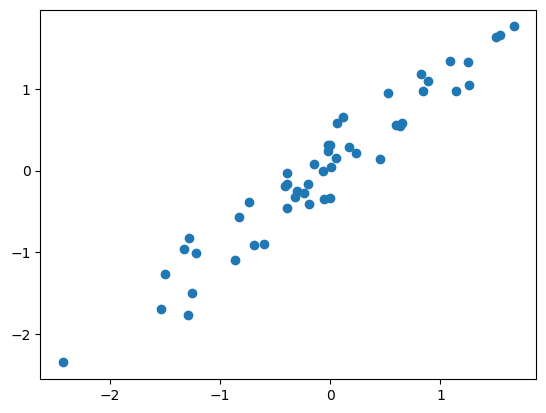

In [109]:
plt.scatter(y_hat_split, split_y2)